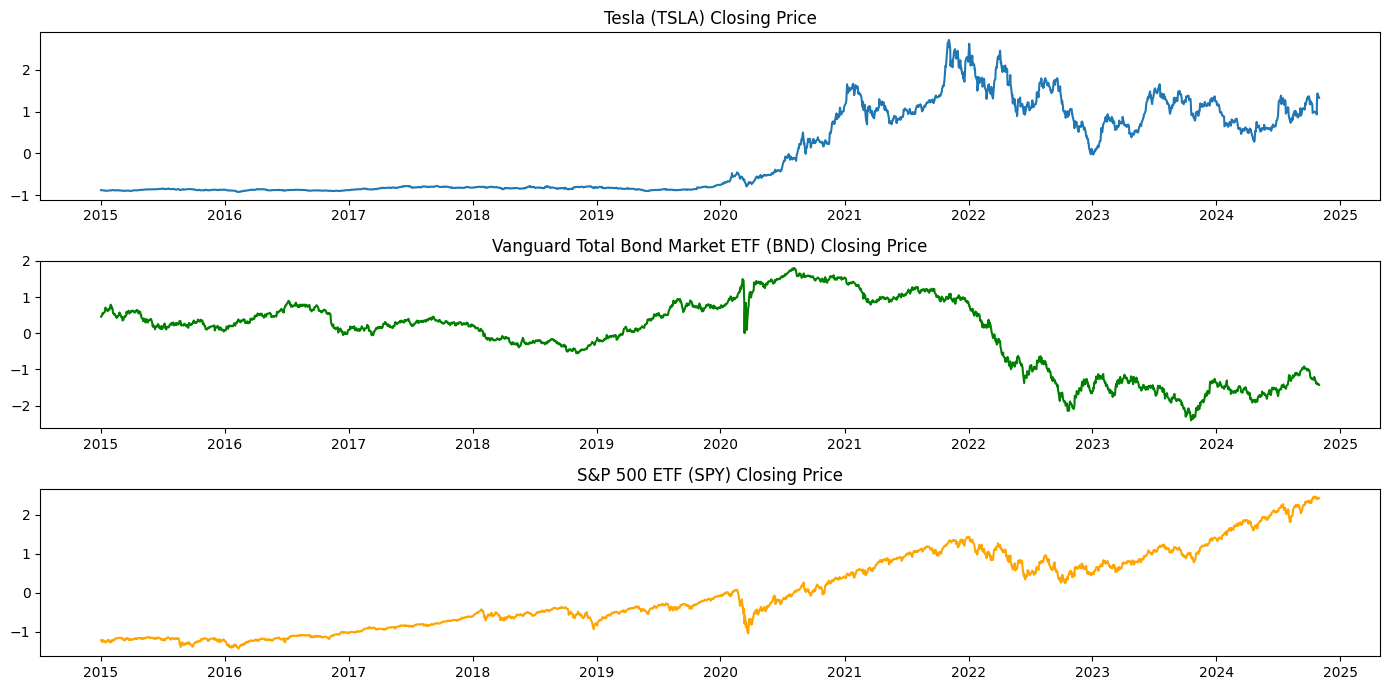

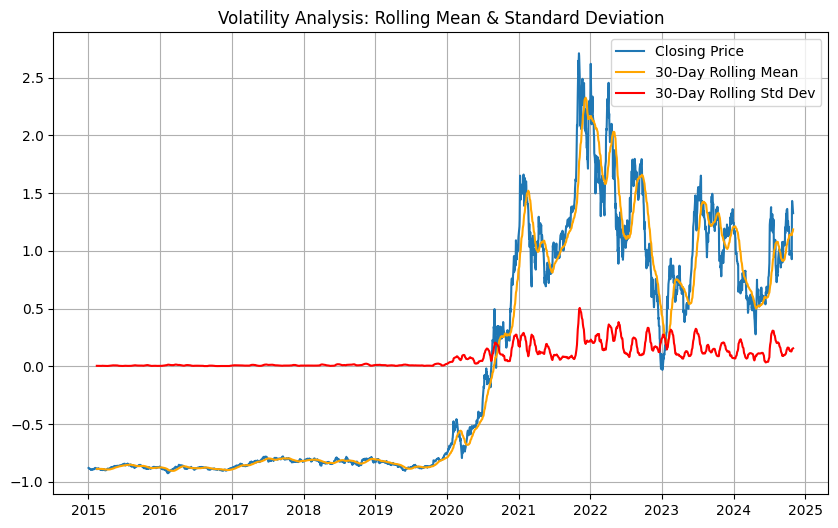

Optimal Portfolio Weights: {'TSLA': 0.3410161668945875, 'BND': 0.0, 'SPY': 0.6589838331054125}
Tesla Sharpe Ratio: -0.14
Tesla Value at Risk (VaR): -0.09


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(daily_returns, risk_free_rate=0.01):
    """
    Calculates the Sharpe ratio for a given asset based on daily returns.
    Sharpe ratio = (mean return - risk-free rate) / standard deviation of return
    """
    sharpe_ratio = (daily_returns.mean() * 252 - risk_free_rate) / (daily_returns.std() * np.sqrt(252))
    return sharpe_ratio

# Calculate Value at Risk (VaR)
def calculate_var(daily_returns, confidence_level=0.95):
    """
    Calculates the Value at Risk (VaR) for a given asset at a specified confidence level.
    VaR is the potential loss in value of an asset over a given time period at a certain confidence level.
    """
    # Check for NaN values in daily returns before calculating VaR
    if daily_returns.isna().sum() > 0:
        print("Warning: NaN values detected in daily returns.")
        daily_returns = daily_returns.dropna()  # Drop NaNs for VaR calculation
    VaR = np.percentile(daily_returns, 100 * (1 - confidence_level))
    return VaR

# Calculate rolling mean and standard deviation for volatility analysis
def calculate_rolling_volatility(data, window=30):
    """
    Calculate rolling mean and standard deviation for short-term volatility analysis.
    """
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    # Plot rolling mean and standard deviation
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(rolling_mean, label=f'{window}-Day Rolling Mean', color='orange')
    plt.plot(rolling_std, label=f'{window}-Day Rolling Std Dev', color='red')
    plt.title('Volatility Analysis: Rolling Mean & Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return rolling_mean, rolling_std

# Portfolio allocation based on Sharpe ratio
def portfolio_allocation(tsla_data, bnd_data, spy_data):
    """
    Calculates the optimal portfolio allocation based on Sharpe ratio and normalizes the weights.
    """
    # Calculate daily returns (percentage change)
    tsla_data['Daily Change'] = tsla_data['Close'].pct_change()
    bnd_data['Daily Change'] = bnd_data['Close'].pct_change()
    spy_data['Daily Change'] = spy_data['Close'].pct_change()

    # Calculate Sharpe ratios for each asset
    tsla_sharpe = calculate_sharpe_ratio(tsla_data['Daily Change'])
    bnd_sharpe = calculate_sharpe_ratio(bnd_data['Daily Change'])
    spy_sharpe = calculate_sharpe_ratio(spy_data['Daily Change'])

    # Total Sharpe ratio and allocation weights based on Sharpe ratio
    total_sharpe = tsla_sharpe + bnd_sharpe + spy_sharpe

    # Assign weights ensuring that no weight is negative (using max with 0)
    weights = {
        "TSLA": max(tsla_sharpe / total_sharpe, 0),
        "BND": max(bnd_sharpe / total_sharpe, 0),
        "SPY": max(spy_sharpe / total_sharpe, 0)
    }

    # Normalize the weights to sum to 1
    weight_sum = sum(weights.values())
    if weight_sum > 0:
        weights = {k: v / weight_sum for k, v in weights.items()}

    return weights

# Load the historical data
def load_data():
    """
    Load the historical data for TSLA, BND, and SPY from CSV files.
    """
    tsla_data = pd.read_csv(r"C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\portfolio-management-optimization\data\TSLA_processed.csv", index_col="Date", parse_dates=True)
    bnd_data = pd.read_csv(r"C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\portfolio-management-optimization\data\BND_processed.csv", index_col="Date", parse_dates=True)
    spy_data = pd.read_csv(r"C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\portfolio-management-optimization\data\SPY_processed.csv", index_col="Date", parse_dates=True)

    return tsla_data, bnd_data, spy_data

# Plot closing prices of the assets
def plot_data(tsla_data, bnd_data, spy_data):
    """
    Plot closing prices of TSLA, BND, and SPY to visualize trends.
    """
    plt.figure(figsize=(14,7))
    
    plt.subplot(311)
    plt.plot(tsla_data['Close'], label='TSLA')
    plt.title('Tesla (TSLA) Closing Price')
    
    plt.subplot(312)
    plt.plot(bnd_data['Close'], label='BND', color='green')
    plt.title('Vanguard Total Bond Market ETF (BND) Closing Price')

    plt.subplot(313)
    plt.plot(spy_data['Close'], label='SPY', color='orange')
    plt.title('S&P 500 ETF (SPY) Closing Price')

    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Load data
    tsla_data, bnd_data, spy_data = load_data()

    # Plot data to visualize trends
    plot_data(tsla_data, bnd_data, spy_data)

    # Preprocess the data: Handle missing values, calculate daily returns
    tsla_data = tsla_data.ffill()  # Replace fillna(method='ffill') with ffill()
    bnd_data = bnd_data.ffill()    # Replace fillna(method='ffill') with ffill()
    spy_data = spy_data.ffill()    # Replace fillna(method='ffill') with ffill()

    # Calculate rolling mean and volatility
    calculate_rolling_volatility(tsla_data)

    # Calculate portfolio allocation based on Sharpe ratio
    weights = portfolio_allocation(tsla_data, bnd_data, spy_data)
    
    print("Optimal Portfolio Weights:", weights)

    # Calculate Sharpe ratio and Value at Risk (VaR)
    tsla_sharpe = calculate_sharpe_ratio(tsla_data['Daily Change'])
    tsla_var = calculate_var(tsla_data['Daily Change'])
    
    print(f"Tesla Sharpe Ratio: {tsla_sharpe:.2f}")
    print(f"Tesla Value at Risk (VaR): {tsla_var:.2f}")

if __name__ == "__main__":
    main()
